In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, SimpleRNN, Input
from tensorflow.keras.callbacks import EarlyStopping
import time
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv("C:\\Users\\user\\Downloads\\mushroom_cleaned.csv")
df.info()
df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1


In [3]:
# Separate features and target variable
y = df['class']
x = df.drop('class', axis=1)

In [4]:

# Convert data to float32 for Keras compatibility
y = y.astype('float32')
x = x.astype('float32')

In [5]:

# Standardize the features
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)


In [6]:
# Split dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=6)

In [7]:

# Early stopping callback
es = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

In [8]:
# Evaluate model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    
    # Fit the model
    model.fit(X_train, y_train, epochs=128, batch_size=128, validation_split=0.2, callbacks=[es])
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary values
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Training Time
    training_time = time.time() - start_time
    
    # Print results
    print(f"\n{model.__class__.__name__} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    
    # Display Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Binary classification
    disp.plot(cmap="Blues")
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.show()

RNN

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7192 - loss: 0.5265 - val_accuracy: 0.8998 - val_loss: 0.2526
Epoch 2/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9092 - loss: 0.2261 - val_accuracy: 0.9429 - val_loss: 0.1499
Epoch 3/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9401 - loss: 0.1509 - val_accuracy: 0.9484 - val_loss: 0.1370
Epoch 4/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9568 - loss: 0.1104 - val_accuracy: 0.9631 - val_loss: 0.1077
Epoch 5/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9661 - loss: 0.0936 - val_accuracy: 0.9683 - val_loss: 0.0885
Epoch 6/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9673 - loss: 0.0874 - val_accuracy: 0.9638 - val_loss: 0.0922
Epoch 7/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9738 - loss: 0.0701 - val_accuracy: 0.9722 - val_loss: 0.0755
Epoch 8/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9756 - loss: 0.0627 - val_ac

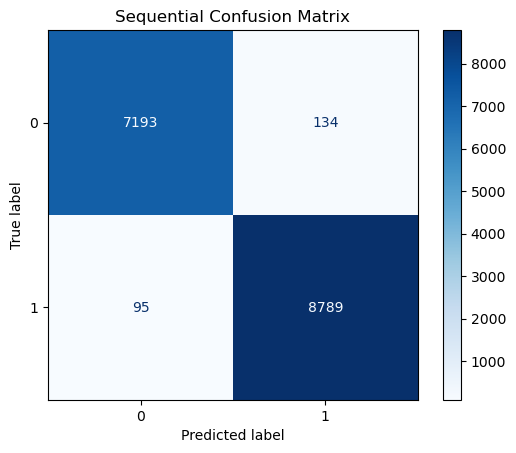

In [9]:
# 1. RNN Model
model_rnn = Sequential()

# Add RNN layer
model_rnn.add(SimpleRNN(128, activation="relu", input_shape=(x.shape[1], 1), return_sequences=True))
model_rnn.add(SimpleRNN(64, activation="relu", return_sequences=False))

# Add dense layers
model_rnn.add(Dense(32, activation="relu"))
model_rnn.add(Dense(1, activation="sigmoid"))

# Compile the RNN model
model_rnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Reshape features for RNN input (samples, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Evaluate the RNN Model
evaluate_model(model_rnn, X_train_rnn, Y_train, X_test_rnn, Y_test)

DNN

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6969 - loss: 0.5684 - val_accuracy: 0.8594 - val_loss: 0.3137
Epoch 2/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8885 - loss: 0.2615 - val_accuracy: 0.9188 - val_loss: 0.2021
Epoch 3/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9384 - loss: 0.1609 - val_accuracy: 0.9580 - val_loss: 0.1128
Epoch 4/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9545 - loss: 0.1170 - val_accuracy: 0.9594 - val_loss: 0.0984
Epoch 5/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9647 - loss: 0.0924 - val_accuracy: 0.9671 - val_loss: 0.0824
Epoch 6/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9711 - loss: 0.0790 - val_accuracy: 0.9621 - val_loss: 0.0968
Epoch 7/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9717 - loss: 0.0766 - val_accuracy: 0.9791 - val_loss: 0.0619
Epoch 8/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9780 - loss: 0.0615 - val_accu

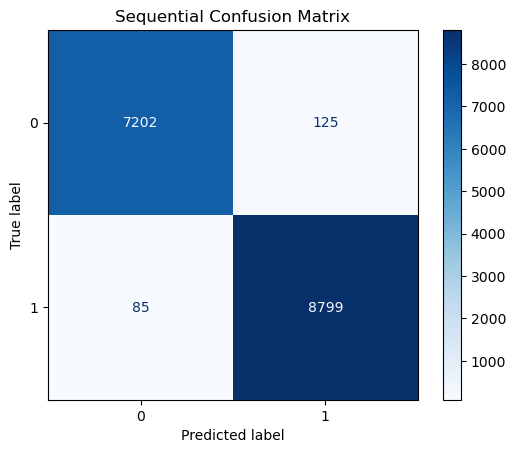

In [10]:
# 2. Dense Neural Network Model
model_dense = Sequential()

model_dense.add(Dense(128, input_dim=8, activation="relu"))
model_dense.add(Dense(64, activation="relu"))
model_dense.add(Dense(64, activation="relu"))
model_dense.add(Dense(32, activation="relu"))
model_dense.add(Dense(32, activation="relu"))
model_dense.add(Dense(1, activation="sigmoid"))

model_dense.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Evaluate the Dense Neural Network Model
evaluate_model(model_dense, X_train, Y_train, X_test, Y_test)

Autoencoder

In [ ]:
# 3. Autoencoder-Classifier Model
input_dim = X_train.shape[1]
encoding_dim = 4  # Compression to 4 features

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation="relu")(input_layer)
encoded = Dense(encoding_dim, activation="relu")(encoded)

# Decoder
decoded = Dense(8, activation="relu")(encoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Encoder Model (to extract compressed features)
encoder = Model(inputs=input_layer, outputs=encoded)

# Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[es])

# Compress features using the Encoder
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Classifier Model (using the compressed features)
classifier = Sequential()
classifier.add(Dense(64, input_dim=encoding_dim, activation="relu"))
classifier.add(Dense(32, activation="relu"))
classifier.add(Dense(1, activation="sigmoid"))

classifier.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Classifier
classifier.fit(X_train_encoded, Y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[es])

# Evaluate the Classifier
evaluate_model(classifier, X_train_encoded, Y_train, X_test_encoded, Y_test)

Epoch 1/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1417 - val_loss: 0.8549
Epoch 2/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8287 - val_loss: 0.7268
Epoch 3/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7093 - val_loss: 0.6813
Epoch 4/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6794 - val_loss: 0.6634
Epoch 5/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6620 - val_loss: 0.6526
Epoch 6/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6610 - val_loss: 0.6454
Epoch 7/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6460 - val_loss: 0.6402
Epoch 8/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6445 - val_loss: 0.6363
Epoch 9/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6383 - val_loss: 0.6337
Epoch 10/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6380 - val_loss: 0.6316
Epoch 11/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6361 - val_loss: 0.6297
Epoch 12/100
473/473 ━━━━━━━━━━━━━━━━━━━━